In [4]:
using Pkg
Pkg.add("Distributions")
Pkg.add("StatsBase")
Pkg.add("Gadfly")

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed IJulia ────────────── v1.18.0
 Installed HDF5 ──────────────── v0.11.0
 Installed DataFrames ────────── v0.17.1
 Installed DataStructures ────── v0.15.0
 Installed Homebrew ──────────── v0.7.1
 Installed PyPlot ────────────── v2.8.0
 Installed Gadfly ────────────── v1.0.1
 Installed Plots ─────────────── v0.23.2
 Installed PDMats ────────────── v0.9.6
 Installed ProgressMeter ─────── v0.9.0
 Installed SoftGlobalScope ───── v1.0.10
 Installed Conda ─────────────── v1.2.0
 Installed DocStringExtensions ─ v0.7.0
 Installed TableTraits ───────── v0.4.1
 Installed Ratios ────────────── v0.3.1
 Installed CodecZlib ─────────── v0.5.2
 Installed MbedTLS ───────────── v0.6.8
 Installed FileIO ────────────── v1.0.5
 Installed Compat ────────────── v2.0.0
 Installed NLSolversBase ─────── v7.3.1
 Installed CategoricalArrays ─── v0.5.2

In [5]:
using Distributions
using StatsBase
using Printf
using Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1186
┌ Warning: Module Compat with build ID 1838896132027 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Precompiling Compose [a81c6b42-2e10-5240-aca2-a61377ecd94b]
└ @ Base loading.jl:1186
┌ Info: Precompiling IndirectArrays [9b13fd28-a010-5f03-acff-a1bbcff69959]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/CategoricalArrays/RHXoP.ji for CategoricalArrays [324d7699-5711-5eae-9e2f-1d82baa6b597]
└ @ Base loading.jl:1184
┌ Warning: Module Compat with build ID 1838896132027 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Precompiling DocStringExtensions [ffbed154-4ef7-542d-bbb7-

In [6]:
# Exercise1
# Use Julia to simulate a vector of 1000 values for  𝛽1  from a normal distribution with mean zero and variance 3. 
# Use the randn command for this. 
# Plot a histogram of these values. Use PyPlot.plt.hist for drawing a histogram

n = 20 #number of observations
k = 1  #number of covariates

 x = reshape(sample([0,1,2],n*k),n,k)
 X = hcat(ones(Int64,n),x)

# Other codes:
# X=(ones(Int64,n),x),rand(Binomial(2,0.5),n)



20×2 Array{Int64,2}:
 1  1
 1  2
 1  0
 1  0
 1  1
 1  2
 1  1
 1  1
 1  1
 1  2
 1  0
 1  2
 1  2
 1  1
 1  1
 1  1
 1  2
 1  1
 1  1
 1  2

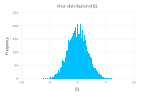

In [7]:
# Plot a histogram of these values

prior = randn(10000)*sqrt(3.0)
plot(x=prior, Geom.histogram, 
Guide.title("Prior distribution of β1"),
Guide.ylabel("Frequency"),
Guide.xlabel("β1"))

In [26]:
# Exercise 2
# Using a value of 1 for  𝛽0  and one of the sampled values of  𝛽1 , 
# generate a vector of observations,  𝐲,  that follows a simple linear regression model. 
# Use  𝜎2𝑒=5  to simulate y.

betaTrue = [1,2]
y = X*betaTrue+ randn(n)*sqrt(5.0)

20-element Array{Float64,1}:
 -0.1259948557058297 
 -2.3403106761454318 
  4.2452252065961735 
  5.134758501272343  
  3.7821081080563594 
  2.8510154162109074 
  6.198902137875995  
 -1.3025954284821557 
  5.201914822063066  
  0.45923781223392435
 -0.8601781461300098 
  6.063618721850655  
  3.9902692790483156 
  2.5404948555108704 
  1.5504215806962511 
  2.4118844517427602 
 -0.6385411474882758 
  8.638205790212528  
  3.430354163537654  
  2.511618039742586  

In [31]:
X

20×2 Array{Int64,2}:
 1  1
 1  0
 1  2
 1  2
 1  0
 1  0
 1  1
 1  1
 1  1
 1  1
 1  0
 1  1
 1  0
 1  1
 1  2
 1  0
 1  1
 1  1
 1  0
 1  2

In [32]:
y

20-element Array{Float64,1}:
 -0.1259948557058297 
 -2.3403106761454318 
  4.2452252065961735 
  5.134758501272343  
  3.7821081080563594 
  2.8510154162109074 
  6.198902137875995  
 -1.3025954284821557 
  5.201914822063066  
  0.45923781223392435
 -0.8601781461300098 
  6.063618721850655  
  3.9902692790483156 
  2.5404948555108704 
  1.5504215806962511 
  2.4118844517427602 
 -0.6385411474882758 
  8.638205790212528  
  3.430354163537654  
  2.511618039742586  

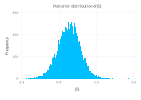

In [41]:
# Exercise3 Use the Gibbs sampler to draw 10,000 samples for  𝛽1  from its posterior distribution.

# loop for Gibbs sampler
niter = 10000      # number of samples
b     = [0.0, 0.0] # initial value of b
meanB = [0.0, 0.0]
a     = Float64[]
vRes = 1
vB1   = 3.0
νRes  = 5
S2Res = vRes*(νRes - 1)/νRes
n     = size(X,1)
for iter = 1:niter
    
    λ = vRes/vB1
    
    # sampling intercept
    w = y - X[:,2] * b[2]
    x = X[:,1]
    xpxi = 1/(x'x)[1]
    bHat = (xpxi*x'w)[1]
    b[1] = rand(Normal(bHat, sqrt(xpxi*vRes))) 
    
    # sampling slope
    w = y - X[:,1]*b[1]
    x = X[:,2]
    xpxi = 1/(x'x + λ)[1]
    bHat = (xpxi*x'w)[1]
    b[2] = rand(Normal(bHat, sqrt(xpxi*vRes)))
    meanB = meanB + b 
    
    # sampling vRes
    e = y - X*b
    SSE = (e'e)[1]
    vRes = (SSE + νRes*S2Res)/rand(Chisq(n+νRes),1)[1]
    push!(a,b[2])

end
plot(x=a, Geom.histogram, 
Guide.title("Posterior distribution of β1"),
Guide.ylabel("Frequency"),
Guide.xlabel("β1"))

In [42]:
using DataFrames
df = DataFrame()
df[:PP] = [fill("Prior",10000); fill("Posterior",10000)]
df[:b1] = [prior; a];

┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184
┌ Warning: Module Compat with build ID 1838896132027 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/DataStreams/E9VAJ.ji for DataStreams [9a8bc11e-79be-5b39-94d7-1ccc349a1a85]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/CodecZlib/1TI30.ji for CodecZlib [944b1d66-785c-5afd-91f1-9de20f533193]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.0/Tables/Z804B.ji for Tables [bd369af6-aec1-5ad0-b16a-f7cc5008161c]
└ @ Base loading.jl:1184
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /opt/julia/packages/Gadfly/09PWZ/src/mapping.jl:228


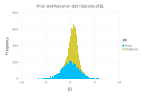

In [43]:
# Draw a histogram of the sampled values. Compare with prior.

plot(df, x="b1", Geom.histogram, 
Guide.title("Prior and Posterior distributions of β1"),
Guide.ylabel("Frequency"),
Guide.xlabel("β1"),
color = "PP")

In [44]:
# Compute the mean and variance of the sampled values

println("mean is ",mean(a))
println("var is ",var(a))

mean is 0.6589600222283497
var is 0.5885059256424903
